# LRMC

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from utils import get_home_and_home_data

In [2]:
data = get_home_and_home_data([i for i in range(1999, 2004)], ot=False)

In [3]:
df = data.copy()
del df['pts_diff_away']

In [4]:
df_count = df.groupby(["pts_diff_home"]).count()

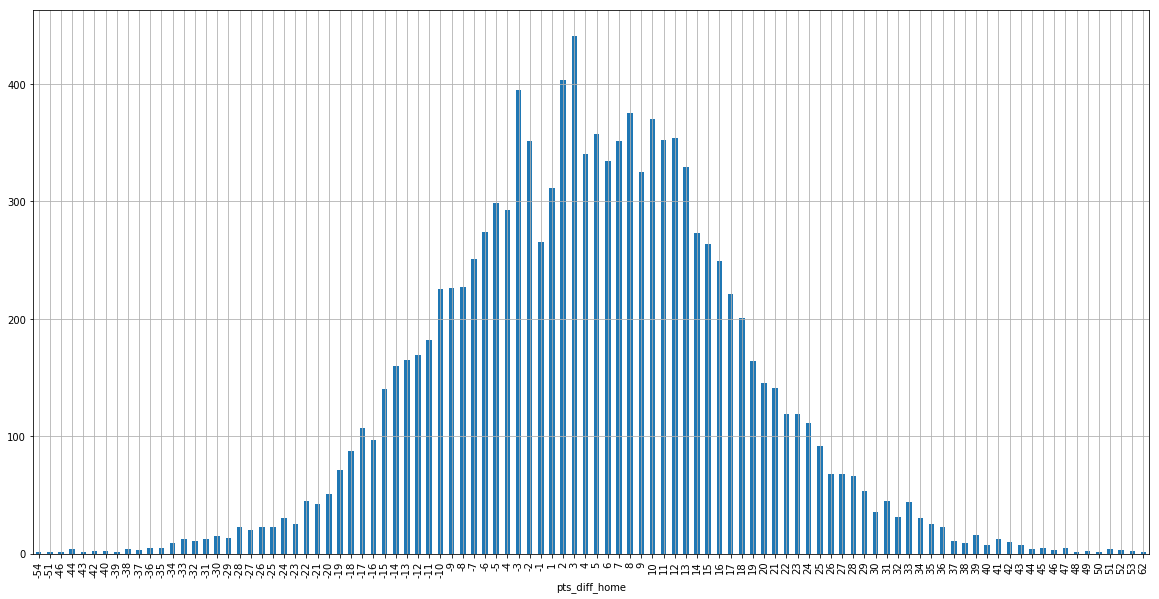

In [5]:
df_count.plot(kind='bar', figsize = (20, 10), grid=True, legend=False)
plt.show()

In [6]:
df_mean = df.groupby(["pts_diff_home"]).mean()

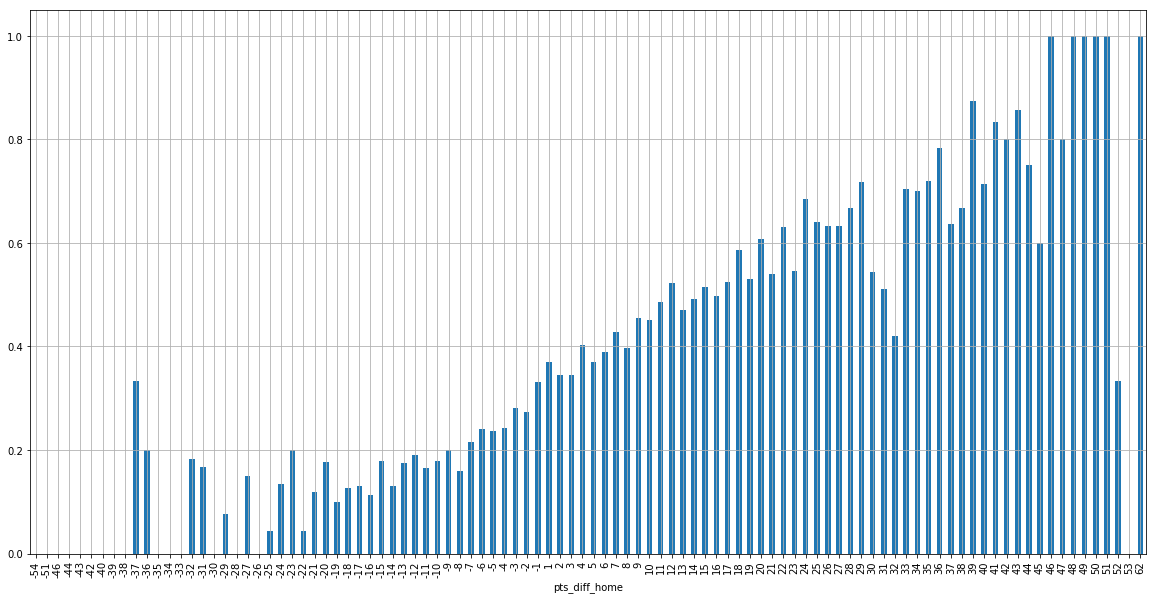

In [7]:
df_mean.plot(kind='bar', figsize = (20, 10), grid=True, legend=False)
plt.show()

In [8]:
X = data["pts_diff_home"].values.reshape(-1, 1)
y = data["W"].values.ravel()

y = y.astype('int')

In [9]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)

In [10]:
a = clf.coef_[0][0]
b = clf.intercept_[0]
print(a, b)

0.027732307591756846 -0.40413383986428764


In [11]:
def model(x, a, b):
    x = x * a + b
    return 1 / (1 + np.exp(-x))

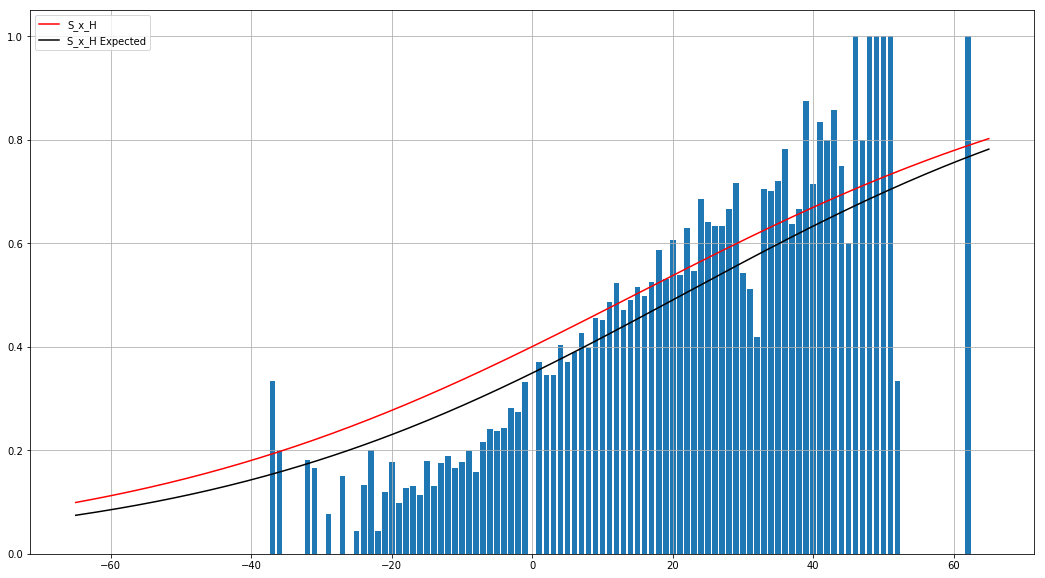

In [12]:
plt.figure(figsize=(18, 10))

X_test = np.linspace(-65, 65, 300)

S_x_H = model(X_test, a , b).ravel()
S_x_H_expected = model(X_test, 0.0292, -0.6228).ravel()

plt.plot(X_test, S_x_H, color='red', label='S_x_H')
plt.plot(X_test, S_x_H_expected, color='black',  label='S_x_H Expected')
plt.bar(df_mean.index, df_mean["W"])

plt.legend()
plt.grid()

plt.show()